In [1]:
from keras.models import Sequential
from keras.layers import Dense

from keras.utils import np_utils
from keras.utils import to_categorical

import pandas as pd

from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# Importovanie datesetov
training_dataset = pd.read_csv('poker-hand-training.data',header=None)
testing_dataset = pd.read_csv('poker-hand-testing.data',header=None)

train_x = training_dataset.iloc[:,0:10].values
train_y = training_dataset.iloc[:, 10].values
test_x = testing_dataset.iloc[:,0:10].values
test_y = testing_dataset.iloc[:, 10].values

In [3]:
kategoricka_premenna_train = np_utils.to_categorical(train_y)
kategoricka_premenna_test = np_utils.to_categorical(test_y)

In [4]:
model = Sequential()
model.add(Dense(32, input_dim=10, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(10, activation='linear'))
model.add(Dense(10, activation='sigmoid'))

# Compiling model
model.compile(loss='mean_squared_error',optimizer='Adam', metrics=['accuracy'])

error = model.fit(train_x, kategoricka_premenna_train, epochs=100)
scores = model.evaluate(train_x, kategoricka_premenna_train)
print("\nAccuracy: %.2f%%" % (scores[1]*100))

Epoch 1/100
25010/25010 [==============================] - 2s 99us/step - loss: 0.0760 - acc: 0.4541
Epoch 2/100
25010/25010 [==============================] - 2s 95us/step - loss: 0.0565 - acc: 0.5155
Epoch 3/100
25010/25010 [==============================] - 2s 77us/step - loss: 0.0560 - acc: 0.5276
Epoch 4/100
25010/25010 [==============================] - 3s 111us/step - loss: 0.0556 - acc: 0.5390
Epoch 5/100
25010/25010 [==============================] - 2s 80us/step - loss: 0.0554 - acc: 0.5429
Epoch 6/100
25010/25010 [==============================] - 2s 74us/step - loss: 0.0552 - acc: 0.5473
Epoch 7/100
25010/25010 [==============================] - 2s 82us/step - loss: 0.0550 - acc: 0.5506
Epoch 8/100
25010/25010 [==============================] - 2s 73us/step - loss: 0.0549 - acc: 0.5529
Epoch 9/100
25010/25010 [==============================] - 2s 89us/step - loss: 0.0547 - acc: 0.5571
Epoch 10/100
25010/25010 [==============================] - 2s 78us/step - loss: 0.0547 - 

25010/25010 [==============================] - 2s 76us/step - loss: 0.0376 - acc: 0.7496
Epoch 82/100
25010/25010 [==============================] - 2s 61us/step - loss: 0.0375 - acc: 0.7490
Epoch 83/100
25010/25010 [==============================] - 2s 80us/step - loss: 0.0373 - acc: 0.7506
Epoch 84/100
25010/25010 [==============================] - 2s 76us/step - loss: 0.0375 - acc: 0.7498
Epoch 85/100
25010/25010 [==============================] - 1s 58us/step - loss: 0.0367 - acc: 0.7547
Epoch 86/100
25010/25010 [==============================] - 2s 89us/step - loss: 0.0362 - acc: 0.7607
Epoch 87/100
25010/25010 [==============================] - 2s 84us/step - loss: 0.0361 - acc: 0.7606
Epoch 88/100
25010/25010 [==============================] - 2s 78us/step - loss: 0.0356 - acc: 0.7628
Epoch 89/100
25010/25010 [==============================] - 2s 73us/step - loss: 0.0352 - acc: 0.7707
Epoch 90/100
25010/25010 [==============================] - 2s 66us/step - loss: 0.0346 - acc: 

In [5]:
#final = model.predict(test_x)

In [6]:
confusion_matrix(test_y, model.predict_classes(test_x))

array([[473717,  27492,      0,      0,      0,      0,      0,      0,
             0,      0],
       [ 94735, 327760,      3,      0,      0,      0,      0,      0,
             0,      0],
       [    29,  47591,      2,      0,      0,      0,      0,      0,
             0,      0],
       [     9,  21112,      0,      0,      0,      0,      0,      0,
             0,      0],
       [  2426,   1459,      0,      0,      0,      0,      0,      0,
             0,      0],
       [  1892,    104,      0,      0,      0,      0,      0,      0,
             0,      0],
       [     0,   1423,      1,      0,      0,      0,      0,      0,
             0,      0],
       [     0,    230,      0,      0,      0,      0,      0,      0,
             0,      0],
       [     9,      3,      0,      0,      0,      0,      0,      0,
             0,      0],
       [     1,      2,      0,      0,      0,      0,      0,      0,
             0,      0]])

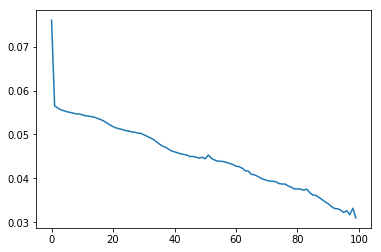

In [7]:
plt.plot(error.history['loss'])
plt.show()